# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Изучение данных из файла

Импортируем необходимы библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
#plt.style.use('ggplot')

Передадим датасет в переменную df

In [2]:
# считываем файл *.csv в переменную df. Разделитель - знак табуляции
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведим первые строки датафрейма

In [3]:
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведим инормацию о датафрейме

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

**Общая информация о таблице**  
Итак, в таблице 22 столбца.

Согласно документации к данным:

| Наименование столбца| информация | тип данный |
|---------------------|------------|------------|
| total_images| число фотографий квартиры в объявлении  | Целочисленный |
| last_price            | Цена на момент снятия с публикации      | Вещественный (float64)  |
| total_area | площадь квартиры в квадратных метрах (м²)  | Вещественный (float64)  |
| first_day_exposition | дата публикации | object |
| rooms | число комнат | Целочисленный (int64) |
| ceiling_height | высота потолков (м) | Вещественный (float64) |
| floors_total | всего этажей в доме |  Вещественный (float64) |
| living_area | жилая площадь в квадратных метрах (м²) | Вещественный (float64) |
| floor | этаж | Цлочисленный (int64) |
| is_apartment | апартаменты (булев тип). Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.| object |
| studio | квартира-студия (булев тип) | bool |
| open_plan | свободная планировка (булев тип) | bool |
| kitchen_area | площадь кухни в квадратных метрах (м²) | Вещественный (float64) |
| balcony | число балконов | Вещественный (float64) |
| locality_name | название населённого пункта | object |
| airports_nearest | расстояние до ближайшего аэропорта в метрах (м) | Вещественный (float64) |
| cityCenters_nearest | расстояние до центра города (м) | Вещественный (float64) |
| parks_around3000 | число парков в радиусе 3 км | Вещественный (float64) |
| parks_nearest | расстояние до ближайшего парка (м) | Вещественный (float64) |
| ponds_around3000 | число водоёмов в радиусе 3 км | Вещественный (float64) |
| ponds_nearest | расстояние до ближайшего водоёма (м) | Вещественный (float64) |
| days_exposition | сколько дней было размещено объявление (от публикации до снятия) | Вещественный (float64) |


Колонока `'cityCenters_nearest'` нарушает общий стиль написания в Python(заглавная буква C). Исправим это сразу


In [5]:
# Переименовываем столбец 'cityCenters_nearest' в 'centers_nearest'
df = df.rename(columns={'cityCenters_nearest':'centers_nearest'})

# Проверим изменения
print(df.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


### Вывод

В каждой строке таблицы — информация о недвижимости, выставленной на продажу.  

Часть колонок описывают характеритстики жилья:
- число балконов
- высота потолков
- этаж
- всего этажей в доме
- тип жилья: апартаменты, квартира-студия
- площадь: жилая, кухни, общая
- число комнат
- тип планировки  

Часть георафические характеристики:
- расстояние до ближайшего аэропорта
- расстояние до центра города
- название населённого пункта
- наличие парков, водоемов в близкой доступности

Часть характеристик связана с объявлением о продаже:
- сколько дней было размещено объявление (от публикации до снятия)
- дата публикации
- цена на момент снятия с публикации
- число фотографий квартиры в объявлении  

Предварительно можно утверждать, что данных достаточно для проверки гипотез.  
Чтобы двигаться дальше, нужно произвести предобработку данных.

## Предобработка данных

Для дальнейшей работы займемся предобработкой данных. Она включает в себя:  
1. Анализ данных на наличие пропусков. Действия по их устранению,
2. Замены типов данных для более комфортной работы с данными,
3. Удалению дубликатов

### Обработка пропусков

Узнаем, сколько пропусков имеет наш датафрейм

In [6]:
# Общее количество пропусков в каждом столбце
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
centers_nearest          5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как мы видим, пропусков очень полно. Но, большинство данных не нужно для нашего исследования. Для исследования нам потребуются столбцы:

- total_area - общая площадь
- living_area — жилая площадь в квадратных метрах
- kitchen_area - площадь кухни в квадратных метрах
- last_price - цена на момент снятия с публикации
- rooms - число комнат
- ceiling_height - высота потолков
- first_day_exposition — дата публикации
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- centers_nearest — расстояние до центра города
- floor — этаж
- floors_total - всего этажей
- locality_name — название населённого пункта

Следовательно, для дальнейшего анализа, мы можем выкинуть ненужные столбцы

In [7]:
# список столбцов
list_col = ['total_area',
            'kitchen_area',
            'living_area',
            'ceiling_height',
            'rooms',
            'last_price',            
            'first_day_exposition',
            'days_exposition',
            'centers_nearest',
            'floor',
            'floors_total',
            'locality_name']

# переприсваиваем датасет. используем только нужные  столбцы
df = df[list_col]

#Проверяем
print(df.columns)

Index(['total_area', 'kitchen_area', 'living_area', 'ceiling_height', 'rooms',
       'last_price', 'first_day_exposition', 'days_exposition',
       'centers_nearest', 'floor', 'floors_total', 'locality_name'],
      dtype='object')


Теперь еще раз проверим количество пропусков

In [8]:
df.isna().sum()

total_area                 0
kitchen_area            2278
living_area             1903
ceiling_height          9195
rooms                      0
last_price                 0
first_day_exposition       0
days_exposition         3181
centers_nearest         5519
floor                      0
floors_total              86
locality_name             49
dtype: int64

Заполним пропуски в населенном пункте.  
В описании, было сказано, что географические положения были созданы автоматически на основе картографических данных. Скорее всего населенный пункт не внесен в картографическую базу. Но более правдоподобный вариант - это трудности с геолокацией  или в объявлении не указали населенный пункт. Пропусков всего 49 или же 0,2% от всех данных. Для иследования их удаление не принесет существенных отклонений. Поэтому можем смело их удалить

In [9]:
# Удаляем пропуски в столбце населенный пункт
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

# проверяем работу кода
df.isna().sum()

total_area                 0
kitchen_area            2269
living_area             1898
ceiling_height          9160
rooms                      0
last_price                 0
first_day_exposition       0
days_exposition         3180
centers_nearest         5511
floor                      0
floors_total              85
locality_name              0
dtype: int64

Пропуска, связанные с планировкой скорее всего являются результатом не полного заполнения объявления. Пропуски будем заполнять медианой, высчитанной из значений для каждого населенного пункта, исходя из предположения, что в пределах одного населенного пункта застройка является типовой. Аналогично поступим и со временем размещения объявления.

In [10]:
df.corr()

,total_area,kitchen_area,living_area,ceiling_height,rooms,last_price,days_exposition,centers_nearest,floor,floors_total
total_area,1.000000,0.608879,0.939534,0.095417,0.758745,0.653743,0.149571,-0.231904,-0.024178,-0.075252
kitchen_area,0.608879,1.000000,0.428773,0.087646,0.270585,0.520233,0.101063,-0.191365,0.136610,0.164803
living_area,0.939534,0.428773,1.000000,0.090556,0.846088,0.566517,0.142171,-0.231170,-0.096825,-0.168940
ceiling_height,0.095417,0.087646,0.090556,1.000000,0.054323,0.085396,0.019025,-0.091480,-0.011677,-0.028586
rooms,0.758745,0.270585,0.846088,0.054323,1.000000,0.363421,0.126497,-0.184322,-0.150604,-0.227913
last_price,0.653743,0.520233,0.566517,0.085396,0.363421,1.000000,0.080937,-0.206887,0.026770,-0.006745
days_exposition,0.149571,0.101063,0.142171,0.019025,0.126497,0.080937,1.000000,-0.059481,-0.039501,-0.052410
centers_nearest,-0.231904,-0.191365,-0.231170,-0.091480,-0.184322,-0.206887,-0.059481,1.000000,0.008508,0.018743
floor,-0.024178,0.136610,-0.096825,-0.011677,-0.150604,0.026770,-0.039501,0.008508,1.000000,0.678010
floors_total,-0.075252,0.164803,-0.168940,-0.028586,-0.227913,-0.006745,-0.052410,0.018743,0.678010,1.000000


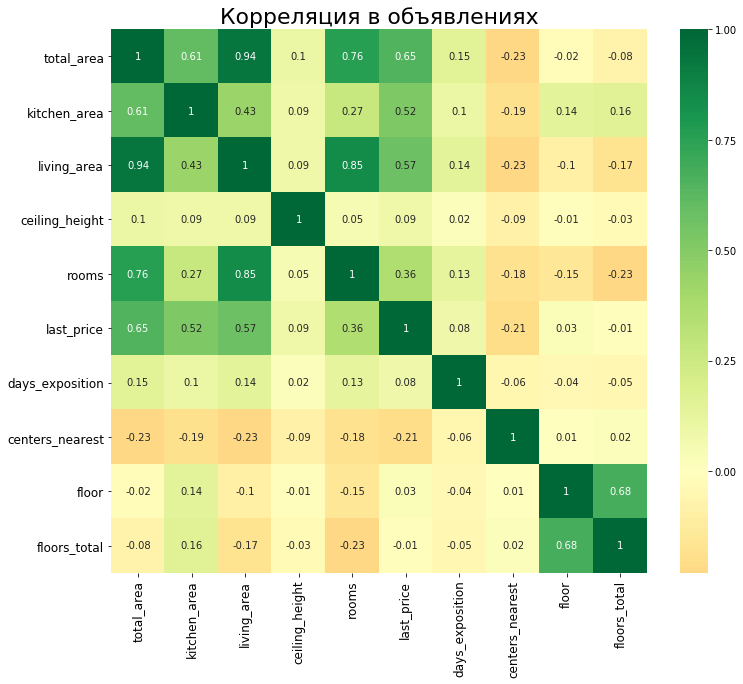

In [11]:
# Plot
plt.figure(figsize=(12,10))
sns.heatmap(
    df.corr().round(2),
    xticklabels=df.corr().columns,
    yticklabels=df.corr().columns,
    cmap='RdYlGn', center=0,
    annot=True)

# Decorations
plt.title('Корреляция в объявлениях', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
# высота потолков
df['ceiling_height'] = df['ceiling_height'].fillna(
    df.groupby('locality_name')['ceiling_height'].transform('median'))

# жилая площадь
df['living_area'] = df['living_area'].fillna(
    df.groupby('locality_name')['living_area'].transform('median'))

# площадь кухни
df['kitchen_area'] = df['kitchen_area'].fillna(
    df.groupby('locality_name')['kitchen_area'].transform('median'))

# расстояние до центра города
df['centers_nearest'] = df['centers_nearest'].fillna(
    df.groupby('locality_name')['centers_nearest'].transform('median'))

# время размещения объявления
df['days_exposition'] = df['days_exposition'].fillna(
    df.groupby('locality_name')['days_exposition'].transform('median'))

# количество этажей
df['floors_total'] = df['floors_total'].fillna(
    df.groupby('locality_name')['floors_total'].transform('median'))

# проверяем работу кода
df.isna().sum()

total_area                 0
kitchen_area              19
living_area               17
ceiling_height           121
rooms                      0
last_price                 0
first_day_exposition       0
days_exposition           80
centers_nearest         5386
floor                      0
floors_total               0
locality_name              0
dtype: int64

К сожалению, в нашем датасете много пропусков. Это говорит о том, что в некоторых населенных пунктах указана недвижимость без указания ее площади, высоты потолков и нет данных о снятии объявления с показов. Заменить общей медианой, по всему стобцу не следует, т.к. дальнейшее исследование предпологает категоризацию по населенным пунктам. Удалим осавшиеся пропуски.

In [13]:
#приводим названия нас.пунктов к нижнему регистру
df['locality_name'] = df['locality_name'].str.lower()
df.duplicated().sum()

# удаляем пропуски
df=df.dropna().reset_index(drop=True)

# проверяем работу
df.isna().sum()

total_area              0
kitchen_area            0
living_area             0
ceiling_height          0
rooms                   0
last_price              0
first_day_exposition    0
days_exposition         0
centers_nearest         0
floor                   0
floors_total            0
locality_name           0
dtype: int64

Все пропуски заменены. Еще раз выведем информацию о датасете и первые строки.

In [14]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 12 columns):
total_area              18259 non-null float64
kitchen_area            18259 non-null float64
living_area             18259 non-null float64
ceiling_height          18259 non-null float64
rooms                   18259 non-null int64
last_price              18259 non-null float64
first_day_exposition    18259 non-null object
days_exposition         18259 non-null float64
centers_nearest         18259 non-null float64
floor                   18259 non-null int64
floors_total            18259 non-null float64
locality_name           18259 non-null object
dtypes: float64(8), int64(2), object(2)
memory usage: 1.7+ MB


,total_area,kitchen_area,living_area,ceiling_height,rooms,last_price,first_day_exposition,days_exposition,centers_nearest,floor,floors_total,locality_name
0,108.0,25.0,51.0,2.70,3,13000000.0,2019-03-07T00:00:00,95.0,16028.0,8,16.0,санкт-петербург
1,40.4,11.0,18.6,2.63,1,3350000.0,2018-12-04T00:00:00,81.0,18603.0,1,11.0,посёлок шушары
2,56.0,8.3,34.3,2.70,2,5196000.0,2015-08-20T00:00:00,558.0,13933.0,4,5.0,санкт-петербург
3,159.0,9.9,31.3,2.70,3,64900000.0,2015-07-24T00:00:00,424.0,6800.0,9,14.0,санкт-петербург
4,100.0,41.0,32.0,3.03,2,10000000.0,2018-06-19T00:00:00,121.0,8098.0,13,14.0,санкт-петербург


Изменим типы данных для более удобной работы с ними.  
Такие столбцы как `'total_area', 'floors_total', 'kitchen_area', 'living_area', 'last_price', 'days_exposition', 'centers_nearest'` можно привести к челочисленному типу, т.к. дробные части не сыграют большой роли и в нашем исследовании не важны.  
Значения в столбце `'ceiling_height'`(высота потолков), округлим до десятых долей

In [15]:
# Нужные столбцы
list_col = ['total_area',
            'living_area',
            'kitchen_area',
            'last_price',
            'days_exposition',
            'centers_nearest',
            'floors_total']

# приводим к целочислнному типу
df[list_col] = df[list_col].astype('int')

# округляем до десятых
df['ceiling_height'] = df['ceiling_height'].round(1)

Значения столбеца 'first_day_exposition' приведем к типу время DateTime

In [16]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Посмотрим на результат

In [17]:
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18259 entries, 0 to 18258
Data columns (total 12 columns):
total_area              18259 non-null int64
kitchen_area            18259 non-null int64
living_area             18259 non-null int64
ceiling_height          18259 non-null float64
rooms                   18259 non-null int64
last_price              18259 non-null int64
first_day_exposition    18259 non-null datetime64[ns]
days_exposition         18259 non-null int64
centers_nearest         18259 non-null int64
floor                   18259 non-null int64
floors_total            18259 non-null int64
locality_name           18259 non-null object
dtypes: datetime64[ns](1), float64(1), int64(9), object(1)
memory usage: 1.7+ MB
None


,total_area,kitchen_area,living_area,ceiling_height,rooms,last_price,first_day_exposition,days_exposition,centers_nearest,floor,floors_total,locality_name
0,108,25,51,2.7,3,13000000,2019-03-07,95,16028,8,16,санкт-петербург
1,40,11,18,2.6,1,3350000,2018-12-04,81,18603,1,11,посёлок шушары
2,56,8,34,2.7,2,5196000,2015-08-20,558,13933,4,5,санкт-петербург
3,159,9,31,2.7,3,64900000,2015-07-24,424,6800,9,14,санкт-петербург
4,100,41,32,3.0,2,10000000,2018-06-19,121,8098,13,14,санкт-петербург


Посмотрим какое количество дубликатов имеет датафрейм

In [18]:
df.duplicated().sum()

0

Дубликаты отсутсвуют

**Вывод**  
Работа с предобработкой данных закончена.

## Расчёты и добавление результатов в таблицу

Для исследования необходимо провести расчеты и добавить в таблицу:  
* цены квадратного метра
* дня недели, месяца и год публикации объявления
* этажа квартиры; варианты — первый, последний, другой
* соотношения жилой и общей площади, а также отношение площади кухни к общей     

Цена квадратного метра

In [19]:
df['price_sq_m'] = df['total_area'] / df['last_price']

Добавление дня, месяца и года публикации

In [20]:
# Цена за квадратный метр
df['price_sq_m'] =  (df['last_price'] / df['total_area']).astype('int')

# день публикации
df['expo_weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday

# месяц публикации
df['expo_month'] = pd.DatetimeIndex(df['first_day_exposition']).month

# год публикации
df['expo_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

# проверка
display(df.head())

,total_area,kitchen_area,living_area,ceiling_height,rooms,last_price,first_day_exposition,days_exposition,centers_nearest,floor,floors_total,locality_name,price_sq_m,expo_weekday,expo_month,expo_year
0,108,25,51,2.7,3,13000000,2019-03-07,95,16028,8,16,санкт-петербург,120370,3,3,2019
1,40,11,18,2.6,1,3350000,2018-12-04,81,18603,1,11,посёлок шушары,83750,1,12,2018
2,56,8,34,2.7,2,5196000,2015-08-20,558,13933,4,5,санкт-петербург,92785,3,8,2015
3,159,9,31,2.7,3,64900000,2015-07-24,424,6800,9,14,санкт-петербург,408176,4,7,2015
4,100,41,32,3.0,2,10000000,2018-06-19,121,8098,13,14,санкт-петербург,100000,1,6,2018


Добавление этажа квартиры; варианты — первый, последний, другой

In [21]:
def set_floor(some_t):
    """ Функция категоризирует этажи в доме """

    floor = some_t['floor'] # этаж квартиры
    floor_t = some_t['floors_total'] # общее количество этажей
    """
    # если этаж первый
    if floor == 1:
        return 'первый'

    # если этаж последний
    elif floor == floor_t:
        return 'последний'

    else:
        return 'другой'"""
    # если этаж первый
    if floor == 1:
        return 1

    # если этаж последний
    elif floor == floor_t:
        return 3

    else:
        return 2

df['floor_grp'] = df.apply(set_floor, axis=1)

Добавление соотношения жилой и общей площади, а также отношение площади кухни к общей

In [22]:
# Отношение площади кухни к общей
df['kitchen_total'] = (df['kitchen_area'] / df['total_area'] * 100).astype('int')

# Отношение жилой площади к
df['living_total'] = (df['living_area'] / df['total_area'] * 100).astype('int')

# проверка
display(df.head())

,total_area,kitchen_area,living_area,ceiling_height,rooms,last_price,first_day_exposition,days_exposition,centers_nearest,floor,floors_total,locality_name,price_sq_m,expo_weekday,expo_month,expo_year,floor_grp,kitchen_total,living_total
0,108,25,51,2.7,3,13000000,2019-03-07,95,16028,8,16,санкт-петербург,120370,3,3,2019,2,23,47
1,40,11,18,2.6,1,3350000,2018-12-04,81,18603,1,11,посёлок шушары,83750,1,12,2018,1,27,45
2,56,8,34,2.7,2,5196000,2015-08-20,558,13933,4,5,санкт-петербург,92785,3,8,2015,2,14,60
3,159,9,31,2.7,3,64900000,2015-07-24,424,6800,9,14,санкт-петербург,408176,4,7,2015,2,5,19
4,100,41,32,3.0,2,10000000,2018-06-19,121,8098,13,14,санкт-петербург,100000,1,6,2018,2,41,32


## Исследовательский анализ данных

Вопросы исследования разбиты по подпунктам

###  Изучение параметров, выборка
* Изучите следующие параметры: площадь, цена, число комнат, высота потолков.  
* Постройте гистограммы для каждого параметра.  
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.


Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

#### Площадь

count    18259.00
mean        63.14
std         38.94
min         12.00
25%         41.00
50%         54.00
75%         73.00
max        900.00
Name: total_area, dtype: float64


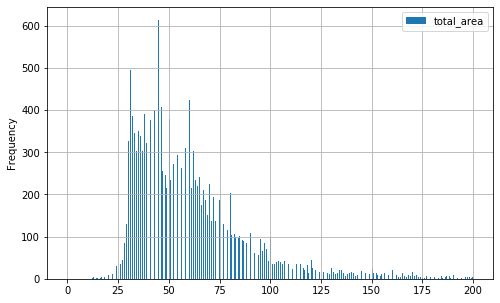

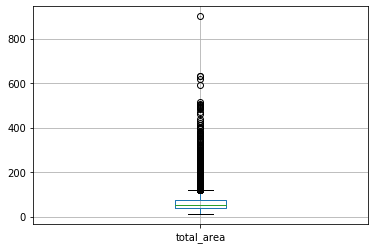

In [23]:
print(df['total_area'].describe().round(2))

df.plot(y='total_area',
        kind='hist',
        figsize=(8,5),
        bins=500,
        range=(0, 200),
        grid=True,
        )

df.plot(kind='box',
        y='total_area',
        grid=True
        );

plt.show()

Слишком маленькая и высокая площади могут негативно сказать на нашем исследовании. Так, например, минимальная площадь 12 м2, максимальная 900. На гистограмме видно, что площади до 30 м2 и свыше 130 м2 встречаются  редко. А именно: 

In [24]:
"""
Подсчет % отбираемых значений
датафрейм отобран по площади.
нижний придел limi1 хранит значения, отбираемые слева
верхний предел limit2 хранит значения, отбираемые справа

делим значения отобранных данных на длину всего датафрейма и умножаем на 100
Получаем проценты, округленные до второго знака
"""

limit1 = 30
print(f'Процент квартир, площадью менее {limit1} м2 =', round(
    len(df.query(' total_area <= @limit1 ')) /
    len(df) * 100,2), '%'
     )
limit2 = 130
print(f'Процент квартир, площадью более {limit2} м2 =', round(
    len(df.query(' total_area >= @limit2 ')) /
    len(df) * 100,2), '%'
     )

Процент квартир, площадью менее 30 м2 = 4.18 %
Процент квартир, площадью более 130 м2 = 4.62 %


Почистим наш датафрейм от редких значений

count    17004.00
mean        57.89
std         21.84
min         30.00
25%         41.00
50%         53.00
75%         70.00
max        130.00
Name: total_area, dtype: float64


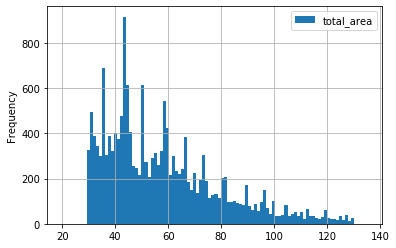

In [25]:
df = df.query('@limit1 <= total_area <= @limit2') #фильтруем датафрейм
print(df['total_area'].describe().round(2))

df.plot(y='total_area',
        kind='hist',
        bins=100,
        range=(20, 135),
        grid=True,
        )


#### Цена

count    1.700400e+04
mean     6.380760e+06
std      4.208811e+06
min      1.219000e+04
25%      4.000000e+06
50%      5.200000e+06
75%      7.300000e+06
max      1.240000e+08
Name: last_price, dtype: float64


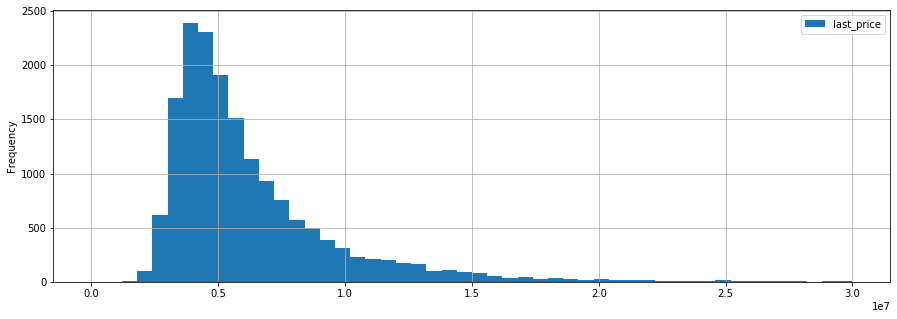

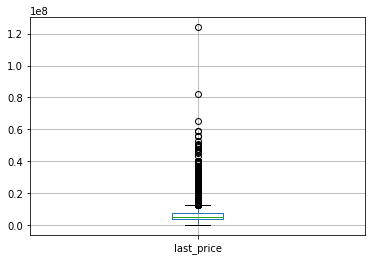

In [26]:
print(df['last_price'].describe())

df.plot(y='last_price',
        kind='hist',
        bins=50,
        range=(0, 30e+6),
        grid=True,
        figsize=(15, 5)
)

df.plot(kind='box',
        y='last_price',
        grid=True,
        );

plt.show()

Аналогично и с ценой на жилье. Слишком низкие и высокие цены на жилье, могут негативно сказать на нашем исследовании. Так, например, минимальная цена 12 т.р., максимальная цена за квартиру составляет 124 млн.

Для адекватного отбора данных исследуем цены на самое дешевое жилье. Для этого просмотрим яндекс недвижимость.

Так для <a href='https://realty.yandex.ru/sankt-peterburg_i_leningradskaya_oblast/kupit/kvartira/?from=main_menu&sort=PRICE'>Санкт-Петербурга и области</a> самое дешевое жилье, на момент составления работы 300 т.р.

In [27]:
limit1 = 300e+3
print(f'Процент квартир, c ценой менее {limit1:.6e} =', round(
    len(df.query(' last_price <= @limit1 ')) /
    len(df) * 100,2), '%'
     )
limit2 = 15e+6
print(f'Процент квартир, ценой более {limit2:.6e} =', round(
    len(df.query(' last_price >= @limit2 ')) /
    len(df) * 100,2), '%'
     )

Процент квартир, c ценой менее 3.000000e+05 = 0.01 %
Процент квартир, ценой более 1.500000e+07 = 3.42 %


count    1.645000e+04
mean     5.847679e+06
std      2.570341e+06
min      1.200000e+06
25%      4.000000e+06
50%      5.100000e+06
75%      6.990000e+06
max      1.500000e+07
Name: last_price, dtype: float64


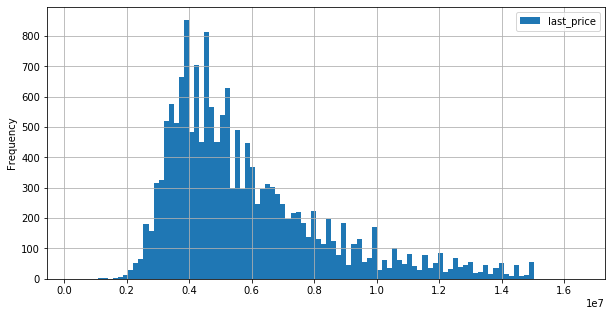

In [28]:
df = df.query(' @limit1 <= last_price <= @limit2')

print(df['last_price'].describe())

df.plot(y='last_price',
        kind='hist',
        bins=100,
        range=(limit1*0.9, limit2*1.1),
        grid=True,
        figsize=(10, 5)
)
plt.show()

#### Количество комнат

count    16450.000000
mean         2.025775
std          0.922265
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64


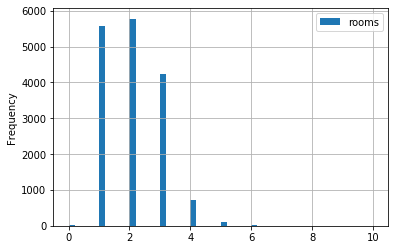

In [29]:
print(df['rooms'].describe())

df.plot(y='rooms',
        kind='hist',
        bins=50,
        range=(0, 10),
        grid=True
);

Как мы видим, встречаются квартиры с количеством комнат 0. И  редко с 7, 6 и 5 комнатами.

In [30]:
# Получаем % от каждого уникального значения в столбце комнаты
how_rooms = df['rooms'].value_counts(normalize=True).sort_values()

print(how_rooms)

# Dscxbnsdftv % комнат 
print( (how_rooms[7] + how_rooms[6]+how_rooms[5] + how_rooms[0])*100)


7    0.000122
6    0.000851
0    0.001581
5    0.006383
4    0.043647
3    0.257325
1    0.338845
2    0.351246
Name: rooms, dtype: float64
0.8936170212765958


Доля квартир с 0, 5, 6, 7 комнатами, составляет 0.9 %

count    16303.000000
mean         2.005827
std          0.881886
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64


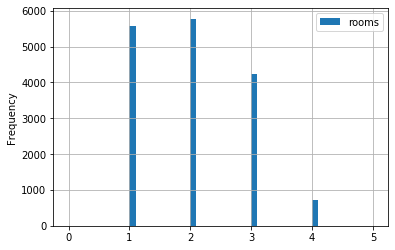

In [31]:
df = df.query('1 <= rooms <= 4')

print(df['rooms'].describe())

df.plot(y='rooms',
        kind='hist',
        bins=50,
        range=(0, 5),
        grid=True
)
plt.show()

#### Высота потолков

count    16303.000000
mean         2.723677
std          0.693839
min          1.000000
25%          2.600000
50%          2.700000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64


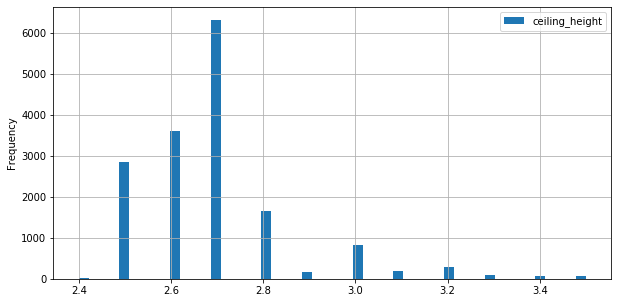

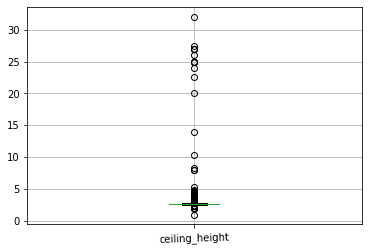

In [32]:
print(df['ceiling_height'].describe())

df.plot(y='ceiling_height',
        kind='hist',
        bins=50,
        range=(2.4, 3.5),
        grid=True,
        figsize=(10,5)
)

df.plot(kind='box',
        y='ceiling_height',
        grid=True,
        rot=2
        );
plt.show()

Посмотрим на распределение потолков.

In [33]:
how_ceil = df['ceiling_height'].value_counts(normalize=True).sort_values(ascending=False)

print(how_ceil)

list_ceil = how_ceil.iloc[0:6].index

print('Процент редких высот:', round((1-how_ceil.iloc[0:6].sum())*100, 3))

2.7     0.387168
2.6     0.220696
2.5     0.174140
2.8     0.101270
3.0     0.050727
3.2     0.017665
3.1     0.012329
2.9     0.009446
3.3     0.006379
3.4     0.004907
3.5     0.004846
3.6     0.002392
4.0     0.001349
2.4     0.001349
3.8     0.001165
3.7     0.001104
4.2     0.000491
3.9     0.000429
4.1     0.000245
25.0    0.000245
27.0    0.000184
2.0     0.000184
4.5     0.000123
8.0     0.000123
4.4     0.000061
1.0     0.000061
8.3     0.000061
4.8     0.000061
5.3     0.000061
4.3     0.000061
22.6    0.000061
26.0    0.000061
20.0    0.000061
4.7     0.000061
14.0    0.000061
24.0    0.000061
1.8     0.000061
27.5    0.000061
32.0    0.000061
10.3    0.000061
2.3     0.000061
Name: ceiling_height, dtype: float64
Процент редких высот: 4.833


Почистим данные

count    15515.00
mean         2.68
std          0.14
min          2.50
25%          2.60
50%          2.70
75%          2.70
max          3.20
Name: ceiling_height, dtype: float64


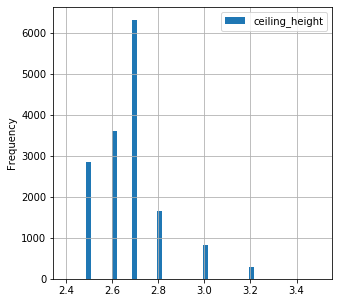

In [34]:
df = df.query('ceiling_height in @ list_ceil')
print(df['ceiling_height'].describe().round(2))
df.plot(y='ceiling_height',
        kind='hist',
        bins=50,
        range=(2.4, 3.5),
        grid=True,
        figsize=(5,5)
)
plt.show()


#### Время продажи квартиры

count    15515.000000
mean       164.462971
std        202.518190
min          1.000000
25%         45.000000
50%         95.000000
75%        193.000000
max       1553.000000
Name: days_exposition, dtype: float64


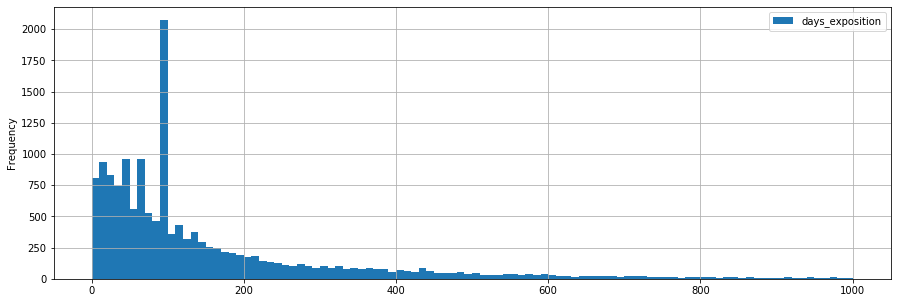

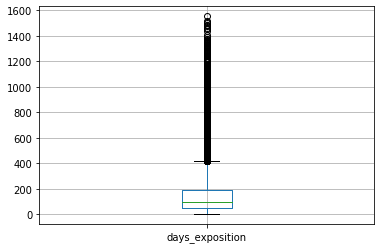

In [35]:
print(df['days_exposition'].describe())

df.plot(y='days_exposition',
        kind='hist',
        bins=100,
        range=(0, 1000),
        grid=True,
        figsize=(15,5)
)

df.plot(kind='box',
        y='days_exposition',
        grid=True,
        );
plt.show()

Имеем выбросы с частотами выше 1000. Также есть большок количество дней, в которых квартира не продается годами. Отсеем их

In [36]:
limit1 = 8
print(f'Процент развещения объявления до {limit1:} =', round(
    len(df.query(' days_exposition <= @limit1 ')) /
    len(df) * 100,2), '%'
     )
limit2 = 600
print(f'Процент развещения объявления после {limit2} =', round(
    len(df.query(' days_exposition >= @limit2 ')) /
    len(df) * 100,2), '%'
     )

Процент развещения объявления до 8 = 4.56 %
Процент развещения объявления после 600 = 4.72 %


count    14177
mean       135
std        127
min          8
25%         47
50%         95
75%        174
max        600
Name: days_exposition, dtype: int64


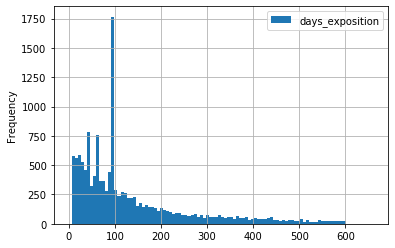

In [37]:
df = df.query(' @limit1 <= days_exposition <= @limit2 ')

print(df['days_exposition'].describe().astype('int'))

df.plot(y='days_exposition',
        kind='hist',
        bins=100,
        range=(0, limit2*1.1),
        grid=True
);
plt.show()

Теперь разберемся с выбросами. Увеличим область

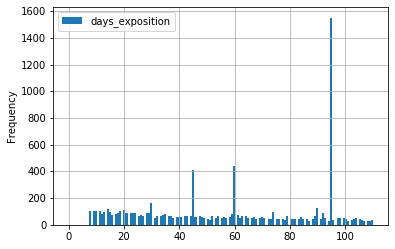

In [38]:
df.plot(y='days_exposition',
        kind='hist',
        bins=150,
        range=(0, 110),
        grid=True
);
plt.show()

In [39]:
# Сводная таблица по дням
how_days = df.groupby('days_exposition')['days_exposition'].count()
print(how_days.head())
len(how_days)

days_exposition
8     101
9     100
10    101
11    101
12     79
Name: days_exposition, dtype: int64


591

In [40]:
# отбираем индексы в которых частота(count) выше 200
list_days = how_days.loc[how_days.values > 200].index

list_days

Int64Index([45, 60, 95], dtype='int64', name='days_exposition')

count    11776
mean       147
std        136
min          8
25%         43
50%        100
75%        204
max        600
Name: days_exposition, dtype: int64


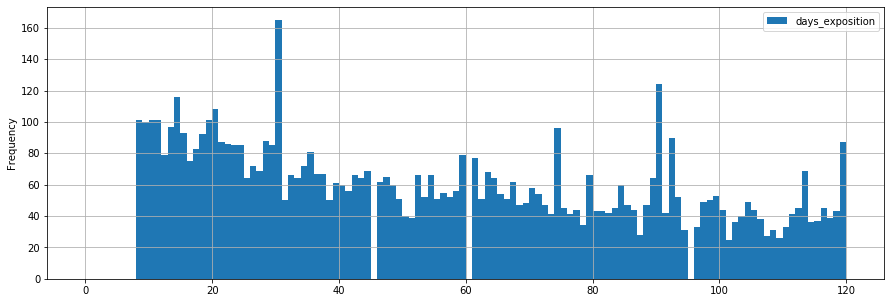

In [41]:
# Очищаем от выбросов
df = df.query(' days_exposition not in @list_days ')

print(df['days_exposition'].describe().astype('int'))

df.plot(y='days_exposition',
        kind='hist',
        bins=120,
        range=(0, 120),
        grid=True,
        figsize=(15,5)
);

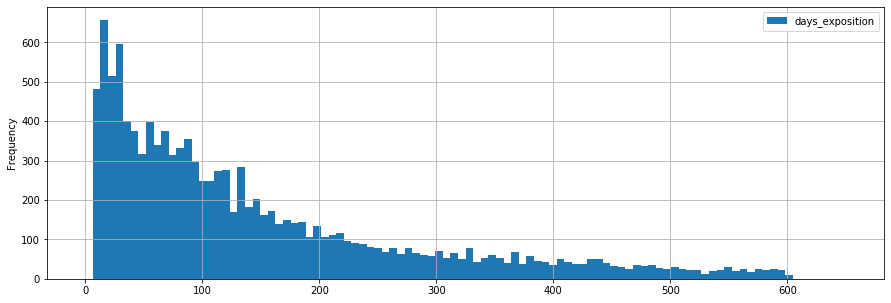

In [42]:
df.plot(y='days_exposition',
        kind='hist',
        bins=100,
        range=(0, 650),
        grid=True,
        figsize=(15,5)
);

Если подумать, то 600 дней продажи(2 года) никак не вяжется с жизненными представлениями о продаже. Однако, дальнейший отбор данных приведет к их ухудшению, поэтому оставим все так.

### Вывод
Датафрейм почищен от редких и выбивающихся значений.

В среднем продажа занимает 147 дней. Исходя из общей информации передаваемой методом .describe(), делаем вывод, что квартира продается:
- быстро, если продана в течении 43 дней (первый квартиль),
- средне, если в течении 44-204 дней (межквартильный размах),
- медленно, если выше 205 дней (третий квартиль)

###  Факторы влияющие на стоимость квартиры

Какие факторы больше всего влияют на стоимость квартиры?  
- зависит ли цена от площади, числа комнат, удалённости от центра. 
- Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом.
- Также изучите зависимость от даты размещения: дня недели, месяца и года.

Для изучения вопроса корреляции обратимся к коэффициенту Пирсона, а так же построим диаграмму рассеивания. Интерпритация коэффициента(градация корреляции) рассмотрена в <a href='https://medstatistic.ru/methods/methods8.html'>этой</a> статье.

Если коэффициент Пирсона:
* менее 0.3 - слабая
* от 0.3 до 0.5 - умеренная
* от 0.5 до 0.7 - заметная
* от 0.7 до 0.9 - высокая
* более 0.9 - весьма высокая  

Детально рассмотрим взаимосвязи с коэффициентом выше 0,5

#### Матрица корреляции

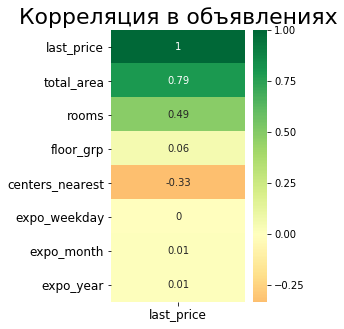

In [43]:
# нужные столбцы
list_corr = ['last_price',
            'total_area',
            'rooms',
            'floor_grp',
            'centers_nearest',
            'expo_weekday',
            'expo_month',
            'expo_year'
            ]

# коэф Пирсона
pirson=df[list_corr].corr()[['last_price']].round(2)

# Plot
plt.figure(figsize=(3,5))
sns.heatmap(
    pirson,
    yticklabels=pirson.index,
    #xticklabels=pirson.index,
    cmap='RdYlGn', center=0,
    annot=True)

# Decorations
plt.title('Корреляция в объявлениях', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Как мы видим, на стоимость квартиры, во всех объявлениях, в основном влияют 3 параметра:
* высокая связь с площадью квартиры,
* заметная связь от колличества комнат
* слабая связь от расстояния. при чем, чем дальше от центра тем ниже цена.  

Остальные параметры практически не влияют на цену.

Построим диаграммы рассеивания

#### Диаграмма рассеивания цена/площадь

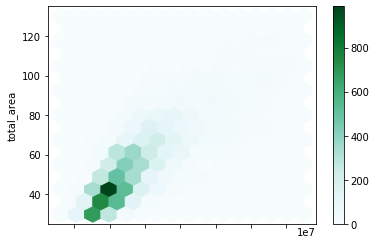

In [44]:
df.plot(x='last_price', y='total_area', kind='hexbin', gridsize=15);

Воспользуемя библиотекой seaborn, для более наглядной визуализации

Взаимосвязь цены и площади, rx=0.79


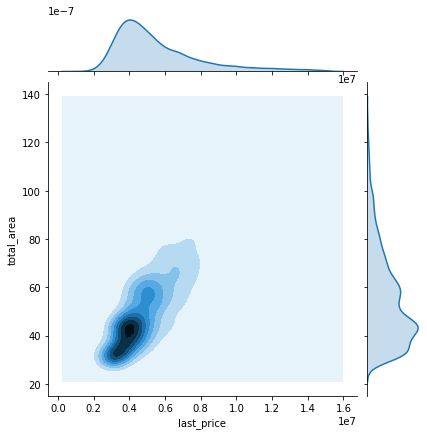

In [45]:
print(f"Взаимосвязь цены и площади, rx={pirson.loc['total_area', 'last_price']}")
      
sns.jointplot(data=df,
              x="last_price",
              y="total_area",
              kind="kde");

#### Диаграмма рассеивания цена/число комнат

Взаимосвязь цены и числа комнат, rx=0.49


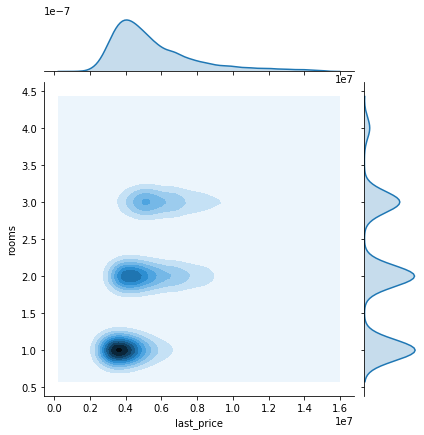

In [46]:
print(f"Взаимосвязь цены и числа комнат, rx={pirson.loc['rooms', 'last_price']}")

sns.jointplot(data=df,
              x="last_price",
              y="rooms",
              kind="kde",
             );

#### Диаграмма рассеивания цена/расстояние от центра

Взаимосвязь цены и расстояния от центра комнат, rx=-0.33


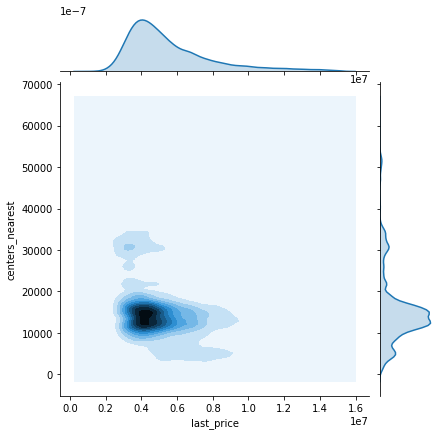

In [47]:
print(f"Взаимосвязь цены и расстояния от центра комнат, rx={pirson.loc['centers_nearest', 'last_price']}")

sns.jointplot(data=df,
              x="last_price",
              y="centers_nearest",
              kind="kde",
             );


#### Вывод 
- цена продажи заметно зависит от общей площади квартиры. сильная корреляция с квартирами площадью от 30 до 50 м2,
- цена продажи высоко зависит от количества комнат. сильная корреляция с однокомнатной квартирой,
- слабая корреляция между ценой и расстоянием до центра,
- этаж квартиры, и даты размещения не влияют на цену.

### Исследование по населенным пунктам

* Выберите 10 населённых пунктов с наибольшим числом объявлений.
* Посчитайте среднюю цену квадратного метра в этих населённых пунктах.
* Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.  
Эти данные можно найти по имени в столбце locality_name.

Выведим первые 10 населённых пунктов с наибольшим числом объявлений

In [48]:
"""сводная таблица с подсчетом кол-ва (count)объявление. столбец можно взять любой.
сводная таблица сортируется по значениям.
выводится 10 значений
выбираем из нее индексы и передаем в список"""

list_col = list(
    df.pivot_table(index='locality_name',
                   values='floor',
                   aggfunc='count') #кол-во
    .sort_values('floor', ascending=False) #сортировка по убыванию
    .head(10).index
)

print(list_col)

['санкт-петербург', 'посёлок шушары', 'пушкин', 'колпино', 'посёлок парголово', 'петергоф', 'красное село', 'сестрорецк', 'ломоносов', 'кронштадт']


Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [49]:
print('Цена за квадратный метр')
display(
    df.query(' locality_name in @list_col ') # проверяем вхождение населенного пункта в списке
    .pivot_table(index='locality_name',
                 values='price_sq_m', aggfunc='mean') # находим среднее арифмитическое
    .sort_values('price_sq_m', ascending=False)
    .astype('int')
)


Цена за квадратный метр


,price_sq_m
locality_name,
санкт-петербург,105744
сестрорецк,100620
пушкин,100566
посёлок парголово,90421
петергоф,83602
кронштадт,79365
посёлок шушары,78335
колпино,75778
ломоносов,73271


Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [50]:
"""
выводим сводную таблицу цен в каждом населенном пункте,
отсортированной под убыванию
"""
print('Самое дорогое жилье')
display(
    df.query(' locality_name in @list_col ') # проверяем вхождение населенного пункта в списке
    .pivot_table(index='locality_name',
                 values='last_price', aggfunc='max')
    .sort_values('last_price', ascending=False) #сортируем по убыванию
    .astype('int')
)

"""
выводим сводную таблицу цен в каждом населенном пункте,
отсортированной под возрастанию
"""
print('Самое дешевое жилье')
display(
    df.query(' locality_name in @list_col ') # проверяем вхождение населенного пункта в списке
    .pivot_table(index='locality_name',
                 values='last_price', aggfunc='min')
    .sort_values('last_price', ascending=True) #сортируем по возрастанию
    .astype('int')
)

Самое дорогое жилье


,last_price
locality_name,
пушкин,15000000
санкт-петербург,15000000
сестрорецк,13999000
колпино,12750000
кронштадт,11500000
петергоф,11100000
посёлок шушары,10990000
ломоносов,9150000
посёлок парголово,9140000


Самое дешевое жилье


,last_price
locality_name,
санкт-петербург,1200000
ломоносов,1650000
красное село,1799000
посёлок парголово,1800000
пушкин,1990000
посёлок шушары,2000000
колпино,2100000
петергоф,2100000
кронштадт,2290000


#### Вывод
Самые дорогие квадратные метры, ценой от 100 т.р. в 
- Санкт-Петербург,
- Сестрорецк,
- Пушкин

Самое дорогое жилье (от 10 до 15 млн.руб) в:
- Пушкин,
- Санкт-Петербург,
- Сестрорецк,
- Колпино,
- Кронштадт,
- Петергоф,
- Посёлок Шушары

Самое дешевое жилье  (от 1.2 до 2 млн) в:
- Cанкт-Петербург,
- Ломоносов,
- Красное село,
- Посёлок Парголово,
- Пушкин,
- Посёлок Шушары


###  Факторы влияющие на стоимость квартиры в Санкт-Петербурге

#### Поиск финансового центра
Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра.  
* Выделите квартиры в Санкт-Петербурге (locality_name). 
* Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра.
* Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

Создаем столбец 'расстояние от центра в км'

In [51]:
df['centers_nearest_km'] = (df['centers_nearest'] / 1000).round(0)

Выделим датафрейм с объявлениями по Санкт-Петербургу

In [52]:
peter = df.query(" locality_name == 'санкт-петербург' ")
print(peter['centers_nearest_km'].describe())

count    9789.000000
mean       12.450710
std         4.406981
min         0.000000
25%        10.000000
50%        13.000000
75%        15.000000
max        29.000000
Name: centers_nearest_km, dtype: float64


Построим график

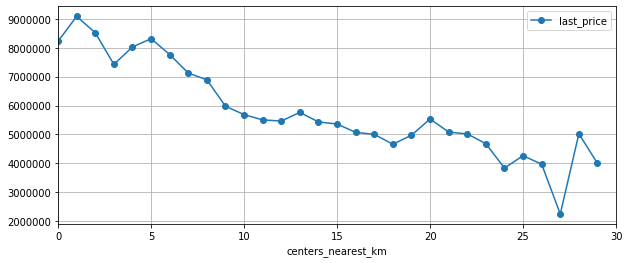

In [53]:
(
    peter
    .pivot_table(index='centers_nearest_km', values='last_price', aggfunc='mean')
    .plot(style='-o', grid=True, xlim=(0, 30), figsize=(10,4))
);

Мы получили график, который практически, равномерно идет вниз. Имеются рывки и диапозоны. Можно выделить группу от 7млн. рублей, которая находится в пределах 7 км.


In [54]:
cent_rad = 7

**Вывод**  
На основании графика, делаем вывод, что финаносовый центр Санкт-Петербурга находится в пределах 7 км.

####  Исследования по Санкт-Петербургу

* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.
* Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы.
* Отличаются ли они от общих выводов по всему городу?  

In [55]:
list_col = ['total_area',
            'last_price',
            'rooms',
            'ceiling_height'
]

In [56]:
# Срез по квартирам в центре
peter_center = peter.query(' centers_nearest_km <= @cent_rad ')

Соберем наглядную статистику чепез describe()

In [57]:
# Статистика по площади
peter_center_area = peter_center['total_area'].describe().astype('int')
peter_area = peter['total_area'].describe().astype('int')

# Статистика по цене
peter_center_price = peter_center['last_price'].describe().astype('int')
peter_price = peter['last_price'].describe().astype('int')

# Статистика по комнатам
peter_center_rooms = peter_center['rooms'].describe().astype('int')
peter_rooms = peter['rooms'].describe().astype('int')

# Статистика по потолкам
peter_center_ceil = peter_center['ceiling_height'].describe().round(2)
peter_сeil = peter['ceiling_height'].describe().round(2)

##### Сравнение по площади квартир

In [58]:
final_stat_area = pd.concat([peter_center_area , peter_area], axis=1)
final_stat_area.columns=['По центру', 'По гроду']


,По центру,По гроду
count,1425,9789
mean,66,55
std,21,19
min,30,30
25%,48,41
50%,64,50
75%,82,66
max,130,130


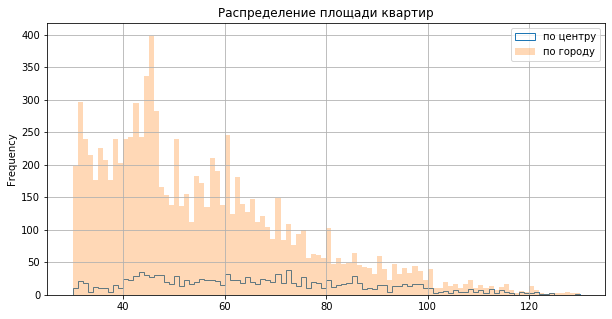

In [59]:
display(final_stat_area)

ax = peter_center.plot(kind='hist',
                       histtype='step',
                       label='по центру',
                       y='total_area',
                       bins=100,
                       figsize=(10,5)
                      )

peter.plot(
    title='Распределение площади квартир',
    kind='hist',
    y='total_area',
    label='по городу',
    alpha=0.3,
    bins=100,
    grid=True,
    figsize=(10,5),
    ax=ax
);


**Вывод**  
Площадь квартир в центре:
* в среднем составляет 66 м2
* основной диапозон  лежит в пределе от 48 до 82 м2

Площадь квартир по городу:
* в среднем составляет 55 м2
* основной диапозон  лежит в пределе от 41 до 66 м2

Значения площадей в центре выше, чем по городу

##### Сравнение по цене квартир

In [60]:
final_stat_price = pd.concat([peter_center_price , peter_price], axis=1)
final_stat_price.columns=['По центру', 'По гроду']

,По центру,По гроду
count,1425,9789
mean,7937248,5811144
std,2762819,2461959
min,2100000,1200000
25%,5800000,4070000
50%,7499000,5100000
75%,9640000,6850000
max,15000000,15000000


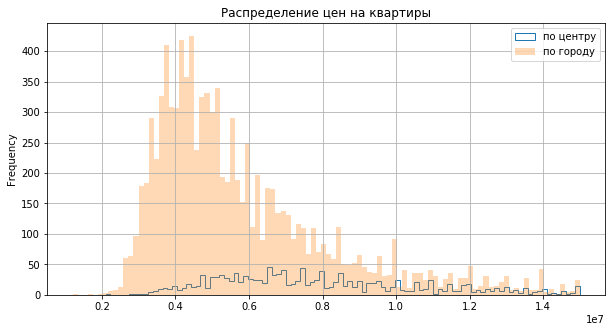

In [61]:
display(final_stat_price)

ax = peter_center.plot(kind='hist',
                       histtype='step',
                       label='по центру',
                       y='last_price',
                       bins=100,
                       figsize=(10,5)
                      )

peter.plot(
    title='Распределение цен на квартиры',
    kind='hist',
    y='last_price',
    label='по городу',
    alpha=0.3,
    bins=100,
    grid=True,
    figsize=(10,5),
    ax=ax
);


**Вывод**  
цены квартир в центре:
* в среднем составляет 7 937 248
* основной диапозон лежит в пределе от 5 800 000 до 9 640 000  

цены квартир по городу:
* в среднем составляет 5 100 000
* основной диапозон лежит в пределе от 4 070 000 до 6 850 000  

Квартиры в центре дороже.

##### Сравнение числа комнат

In [62]:
final_stat_rooms = pd.concat([peter_center_rooms , peter_rooms], axis=1)

final_stat_rooms.columns=['По центру', 'По гроду']

,По центру,По гроду
count,1425,9789
mean,2,1
std,0,0
min,1,1
25%,2,1
50%,2,2
75%,3,3
max,4,4


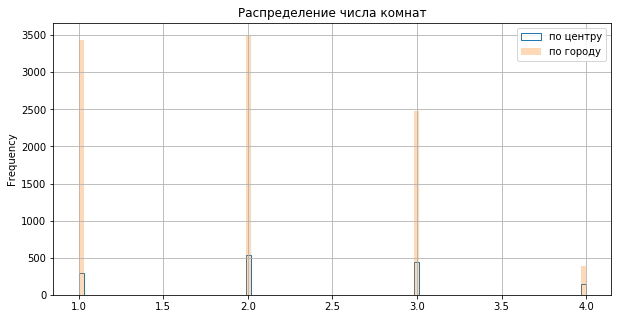

In [63]:
display(final_stat_rooms)

ax = peter_center.plot(kind='hist',
                       histtype='step',
                       label='по центру',
                       y='rooms',
                       bins=100,
                       figsize=(10,5)
                      )

peter.plot(
    title='Распределение числа комнат',
    kind='hist',
    y='rooms',
    label='по городу',
    alpha=0.3,
    bins=100,
    grid=True,
    figsize=(10,5),
    ax=ax
);

**Вывод**  
* в центре преобладают кваритры с 2 и 3 комнатами,
* в городе преобладают квартиры с 1 и 2 комнатами

##### Сравнение высот потолков

In [64]:
final_stat_ceil = pd.concat([peter_center_ceil , peter_сeil], axis=1)

final_stat_ceil.columns=['По центру', 'По гроду']

,По центру,По гроду
count,1425.00,9789.00
mean,2.79,2.69
std,0.18,0.14
min,2.50,2.50
25%,2.70,2.60
50%,2.70,2.70
75%,2.80,2.70
max,3.20,3.20


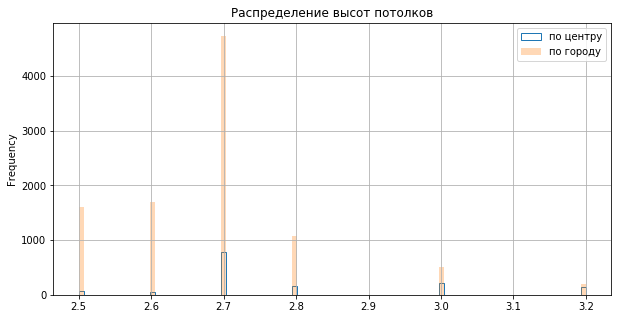

In [65]:
display(final_stat_ceil)

ax = peter_center.plot(kind='hist',
                       histtype='step',
                       label='по центру',
                       y='ceiling_height',
                       bins=100,
                       figsize=(10,5)
                      )

peter.plot(
    title='Распределение высот потолков',
    kind='hist',
    y='ceiling_height',
    label='по городу',
    alpha=0.3,
    bins=100,
    grid=True,
    figsize=(10,5),
    ax=ax
);

**Вывод**  
В центре преобладают потолки высотой 2,7 м, а в городе от 2,5 до 2,8 м

#### Корреляция по Санкт-Петербургу

Изучим корреляцию, аналогично п 4.2.1

In [66]:
# Корреляция по центру
peter_center_corr = df.query('centers_nearest_km <=7')[list_corr].corr().round(2)

Коореляция по всему городу

In [67]:
# Корреляция по городу
peter_city_corr = peter[list_corr].corr().round(2)

Для наглядности выделим стобцы last_price в Series и объедиминим их.

In [68]:
final_corr = pd.concat( [peter_center_corr['last_price'], peter_city_corr['last_price']], axis=1 )
final_corr.columns = ['Корреляция по центру', 'Корреляция по городу']

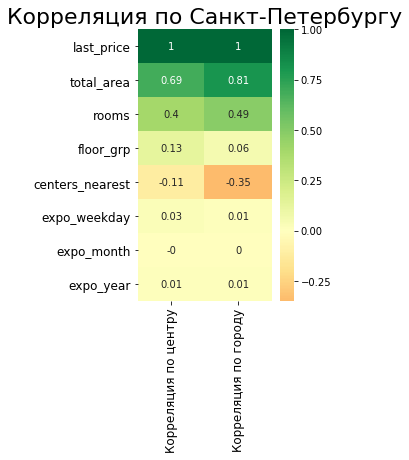

In [69]:
# Plot
plt.figure(figsize=(3,5))
sns.heatmap(
    final_corr,
    yticklabels=final_corr.index,
    #xticklabels=pirson.index,
    cmap='RdYlGn', center=0,
    annot=True)

# Decorations
plt.title('Корреляция по Санкт-Петербургу', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


Из таблицы коррелиции видна:
* высокая взаимосвязь между ценой и площадью квартиры как в центре так и в городе.
* умеренная корреляция между ценой и числом комнат,
* умеренная корреляция между расположением квартиры и ценой по городу. В центре взаимосвязь низкая

Низкая взимосвязь цен в центре города, объясняется их общим расположением в центре города.

#### Вывод
* В центре города средние характеристики квартиры(площадь, цена, число комнат, высота потолков) выше чем во всем городе.
* В рамках города корреляция цены от расстояния слабая. В самом центре отсутствует. Связано, скорее всего с принадлежностью квартир к центру города и отдалением городских квартир от центра.
* По колличеству комнат умеренная корреляция по всему городу.
* По этажам слабая корреляция.
* Дата публикации объявления никак не вляет на цену

## Общий вывод

1. Была произведена работа по анализу, предобработке и категоризации данных.
2. В процессе анализа были выявлены пропуски и ошибки в заполнении информации, полученной из объявлений. Было сделано предположение о их природе и проведена работа по устранению.
3. Произведены дополнительные расчеты, необходимые для исследований.
4. Были убраны редкие и выбивающиеся значения.
5. Составлены таблицы, отвечающие запросам исследования. Дана краткая интерпритация полученных результатов.